In [36]:
from googlefinance.get import get_code
import datetime
import quandl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

In [145]:
start = datetime.datetime(2013,1,1)
end = datetime.date.today()

s = "TSLA" 
tesla = quandl.get("WIKI/" + s, start_date=start, end_date=end)
# Importing the training set
dataset_train = tesla
print(dataset_train.head())
training_set = dataset_train.iloc[:, 1:2].values
 # Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

tesla

             Open     High     Low  Close     Volume  Ex-Dividend  \
Date                                                                
2013-01-02  35.00  35.4499  34.705  35.36  1194800.0          0.0   
2013-01-03  35.18  35.4500  34.750  34.77   742000.0          0.0   
2013-01-04  34.80  34.8000  33.920  34.40   674000.0          0.0   
2013-01-07  34.80  34.8000  33.900  34.34   442000.0          0.0   
2013-01-08  34.50  34.5000  33.110  33.68  1284000.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2013-01-02          1.0      35.00    35.4499    34.705       35.36   
2013-01-03          1.0      35.18    35.4500    34.750       34.77   
2013-01-04          1.0      34.80    34.8000    33.920       34.40   
2013-01-07          1.0      34.80    34.8000    33.900       34.34   
2013-01-08          1.0      34.50    34.5000    33.110       33.68   

            Adj. V

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2013-01-02,35.00,35.4499,34.7050,35.360,1194800.0,0.0,1.0,35.00,35.4499,34.7050,35.360,1194800.0
2013-01-03,35.18,35.4500,34.7500,34.770,742000.0,0.0,1.0,35.18,35.4500,34.7500,34.770,742000.0
2013-01-04,34.80,34.8000,33.9200,34.400,674000.0,0.0,1.0,34.80,34.8000,33.9200,34.400,674000.0
2013-01-07,34.80,34.8000,33.9000,34.340,442000.0,0.0,1.0,34.80,34.8000,33.9000,34.340,442000.0
2013-01-08,34.50,34.5000,33.1100,33.680,1284000.0,0.0,1.0,34.50,34.5000,33.1100,33.680,1284000.0
2013-01-09,34.01,34.1900,33.4000,33.640,698000.0,0.0,1.0,34.01,34.1900,33.4000,33.640,698000.0
2013-01-10,33.87,33.9900,33.3800,33.530,922500.0,0.0,1.0,33.87,33.9900,33.3800,33.530,922500.0
2013-01-11,34.04,34.0400,32.1100,32.910,1563200.0,0.0,1.0,34.04,34.0400,32.1100,32.910,1563200.0
2013-01-14,33.08,33.3800,32.8500,33.260,925100.0,0.0,1.0,33.08,33.3800,32.8500,33.260,925100.0


In [146]:
training_set

array([[ 35.4499],
       [ 35.45  ],
       [ 34.8   ],
       ...,
       [311.61  ],
       [307.59  ],
       [304.27  ]])

In [89]:
training_set_scaled.shape

(1317, 1)

In [90]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
Y_train = []
for i in range(60, 1317):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

X_train.shape

(1257, 60)

In [91]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1257, 60, 1)

LSTM


In [92]:
import keras

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Activation
from keras.preprocessing import sequence

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt


In [244]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#model.add(Dense(1, activation='relu'))
model.add(Dropout(0.3))

model.add(LSTM(units = 50, return_sequences = True))
#model.add(Dense(1, activation='softmax'))
model.add(Dropout(0.3))

model.add(LSTM(units = 50, return_sequences = True))
#model.add(Dense(1, activation='relu'))
model.add(Dropout(0.3))

model.add(LSTM(units = 50))
#model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.3))

model.add(Dense(units=1))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_80 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_77 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_81 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_78 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_82 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_79 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_83 (LSTM)               (None, 50)                20200     
__________

In [245]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [263]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 64)


Epoch 1/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.0034
Epoch 2/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.0034
Epoch 3/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.0036
Epoch 4/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.0034
Epoch 5/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.0032
Epoch 6/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.0032
Epoch 7/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.0029
Epoch 8/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.0035
Epoch 9/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.0031
Epoch 10/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.0033


In [264]:
dataset_test = tesla
real_stock_price= dataset_test.iloc[:, 1:2].values

real_stock_price


array([[ 35.4499],
       [ 35.45  ],
       [ 34.8   ],
       ...,
       [311.61  ],
       [307.59  ],
       [304.27  ]])

In [265]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
#print(inputs.shape)
training_set.shape
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape((1377,1))
inputs.shape

(1377, 1)

In [266]:

#print(dataset_total[-1:-10:-1])
#inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
#print(inputs[-1:-10:-1])
sc = MinMaxScaler(feature_range = (0, 1))
test_scaled = sc.fit_transform(inputs)
inputs = test_scaled.reshape(-1,1)
#inputs = sc.transform(inputs)
print(inputs[-1:-10:-1])

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#print(X_test[0:2])
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
print("predicted: ",predicted_stock_price[-1:-10:-1])
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print("reverse predicted: ",predicted_stock_price[-1:-10:-1])


[[0.7661548 ]
 [0.77560024]
 [0.78665762]
 [0.79412347]
 [0.78382964]
 [0.79689488]
 [0.80150448]
 [0.82825712]
 [0.83792879]]
predicted:  [[0.07794913]
 [0.07952525]
 [0.07754467]
 [0.07117263]
 [0.06020986]
 [0.04537247]
 [0.02870618]
 [0.01372133]
 [0.00516419]]
reverse predicted:  [[60.643593]
 [61.20092 ]
 [60.500572]
 [58.247356]
 [54.370804]
 [49.124157]
 [43.230793]
 [37.932   ]
 [34.90611 ]]


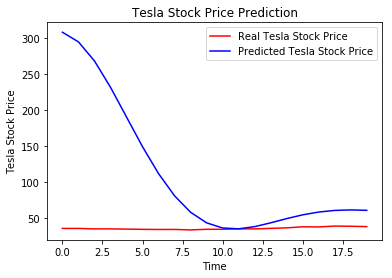

In [267]:
plt.plot(real_stock_price[0:20], color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [262]:
predicted_stock_price[-20:-1]

array([[305.6395  ],
       [294.23535 ],
       [271.63965 ],
       [239.28795 ],
       [200.90771 ],
       [160.67787 ],
       [122.2853  ],
       [ 88.54399 ],
       [ 61.2925  ],
       [ 41.399826],
       [ 28.870136],
       [ 23.004307],
       [ 22.585295],
       [ 26.104076],
       [ 31.977678],
       [ 38.765427],
       [ 45.32873 ],
       [ 50.899445],
       [ 55.049236]], dtype=float32)